In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!sudo apt-get install subversion

In [ ]:
!svn export https://github.com/Aminsaffar/celebA/trunk/data/celeb_a_100x120

A    celeb_a_100x120
A    celeb_a_100x120/celeb_a_100x120.z01
A    celeb_a_100x120/celeb_a_100x120.z02
A    celeb_a_100x120/celeb_a_100x120.z03
A    celeb_a_100x120/celeb_a_100x120.z04
A    celeb_a_100x120/celeb_a_100x120.z05
A    celeb_a_100x120/celeb_a_100x120.z06
A    celeb_a_100x120/celeb_a_100x120.z07
A    celeb_a_100x120/celeb_a_100x120.z08
A    celeb_a_100x120/celeb_a_100x120.z09
A    celeb_a_100x120/celeb_a_100x120.zip
Exported revision 6.


In [ ]:
%%capture
!zip -s- /content/celeb_a_100x120/celeb_a_100x120.zip -O celeb_a_100x120.zip

In [ ]:
%%capture
!unzip /content/celeb_a_100x120.zip

In [ ]:
directory = "/content/content/celeb_a-100x120"
images = []
for filename in os.listdir(directory):
    image = cv2.imread(os.path.join(directory, filename))
    images.append(image)
images = np.asarray(images)

In [70]:
def gallery(array, ncols=10):
    nindex, height, width, intensity = array.shape
    nrows = nindex//ncols
    assert nindex == nrows*ncols
    # want result.shape = (height*nrows, width*ncols, intensity)
    result = (array.reshape(nrows, ncols, height, width, intensity)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols, intensity))
    return result

In [73]:
indices = np.random.choice(images.shape[0], 800, replace=False)
selectedImages = images[indices]

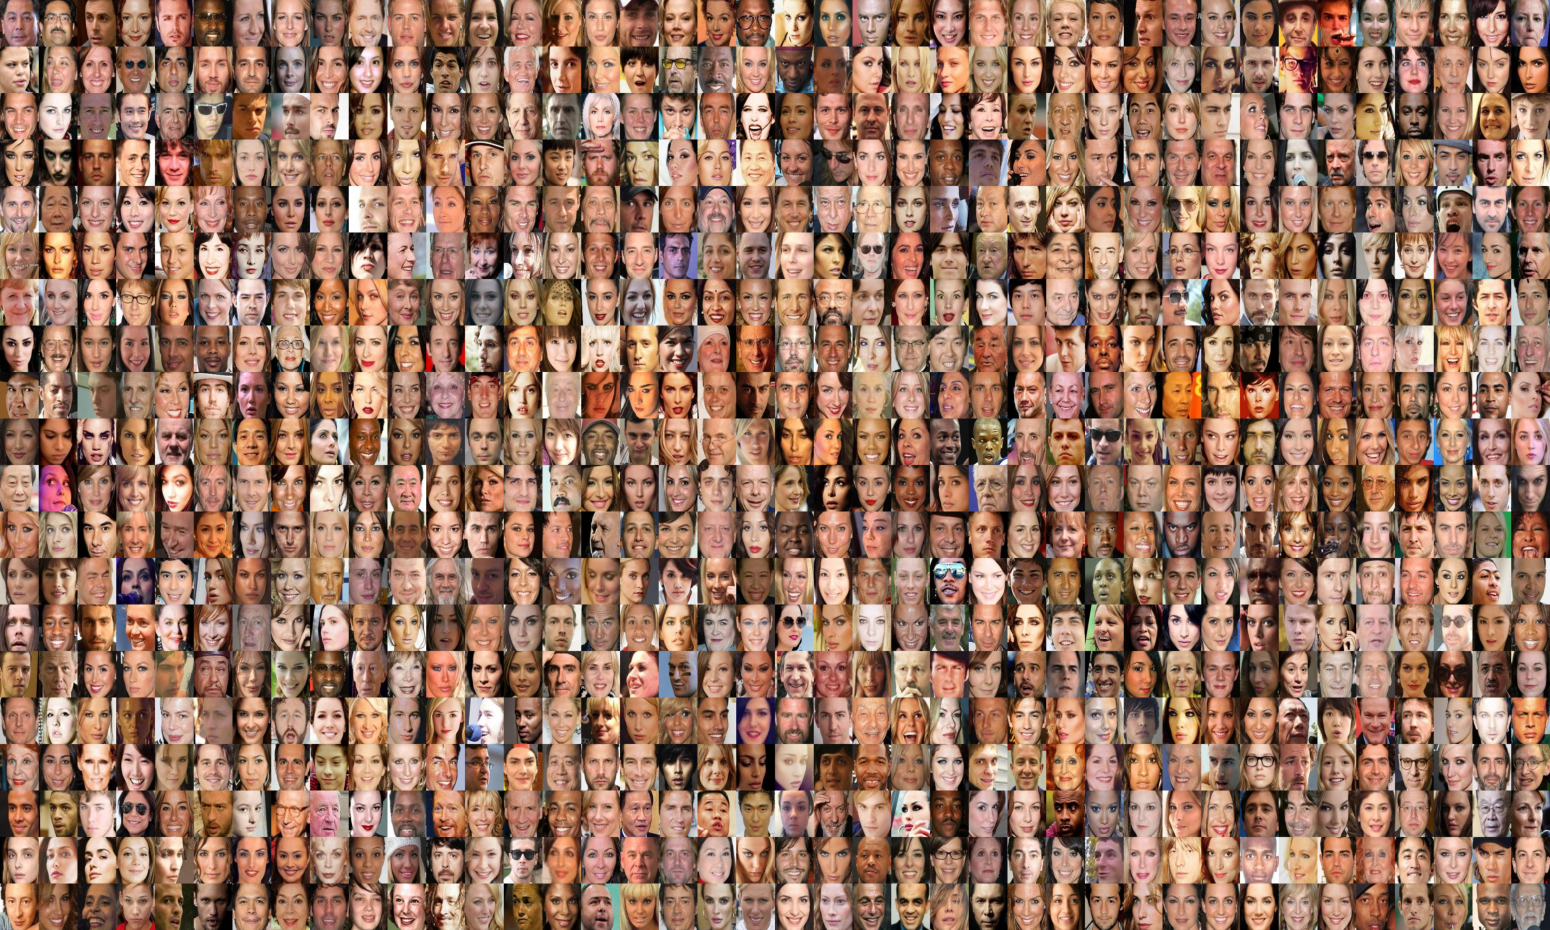

In [75]:
plt.figure(figsize=(1000, 1000),dpi=2)
# plt.figure(figsize=(1280, 640), dpi=my_dpi)
result = gallery(selectedImages, 40)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result)
plt.axis('off')
plt.show()